### 1. Pre-Processing

- Import the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [8]:
tennis_df = pd.read_csv("tennis_stats.csv")
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

##### Correlation matrix - Heat map of different features.

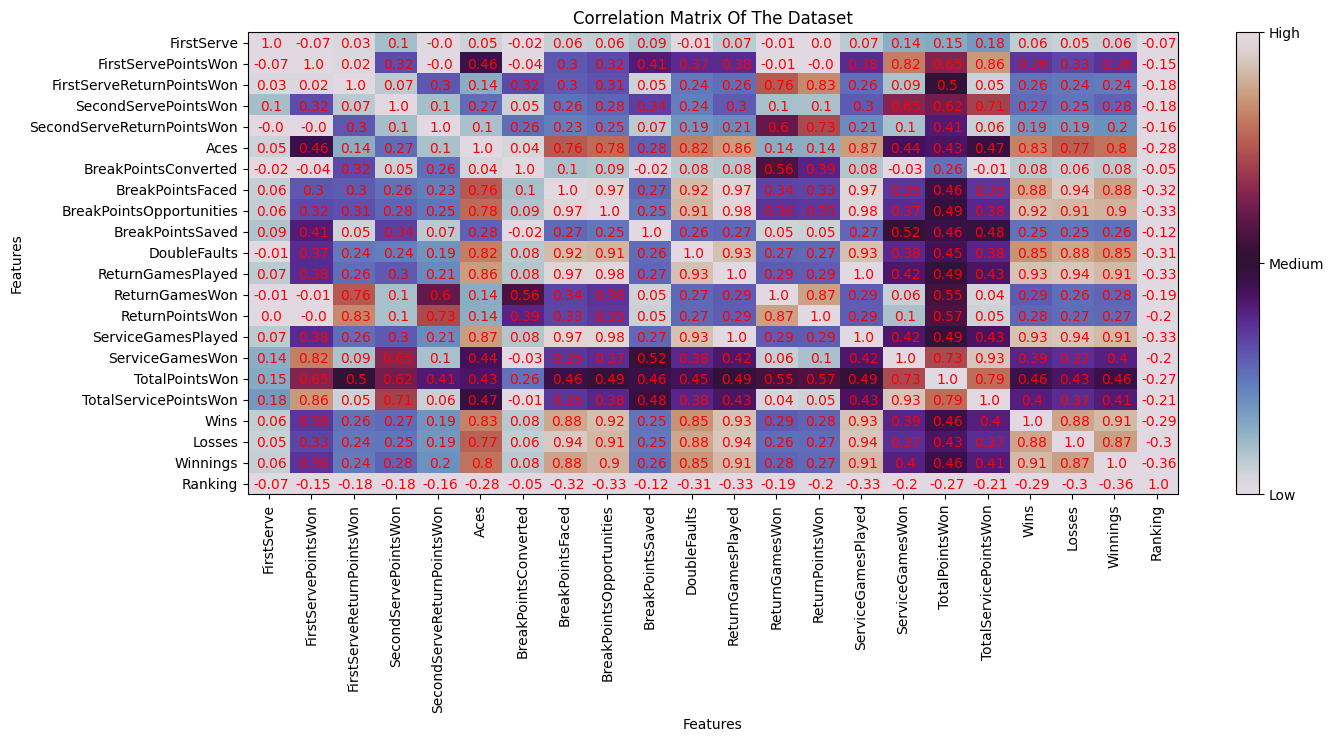

<Figure size 1300x600 with 0 Axes>

In [9]:
features = tennis_df.iloc[:,2:]
# Calculate correlation between columns 
corr_matrix = features.corr() 
fig = plt.figure(figsize=(15,6))
# Plot the heatmap with custom colors and annotations
plt.imshow(corr_matrix,cmap="twilight",interpolation="nearest",vmin=0,vmax=1,aspect="auto")
for i in range(len(corr_matrix)): 
    for j in range(len(corr_matrix)): 
        plt.annotate(str(round(corr_matrix.values[i][j], 2)),xy=(j+0.05, i+0.07), ha='center', va='center', color='red')
        
# Add colorbar 
cbar = plt.colorbar(ticks=[0, 0.5, 1]) 
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

# Set plot title and axis labels 
plt.title("Correlation Matrix Of The Dataset") 
plt.xlabel("Features") 
plt.ylabel("Features")

# Set tick labels 
plt.xticks(range(len(corr_matrix.columns)),corr_matrix.columns, rotation=90) 
plt.yticks(range(len(corr_matrix.columns)),corr_matrix.columns)

plt.show()
plt.clf()

##### Creating a Scatter plot of one features to understand the relationship.

From the heatmap we can see a strong correlation between "Wins" and "Break Points Oppurtunites". Lets see a scatter visualisation of this.

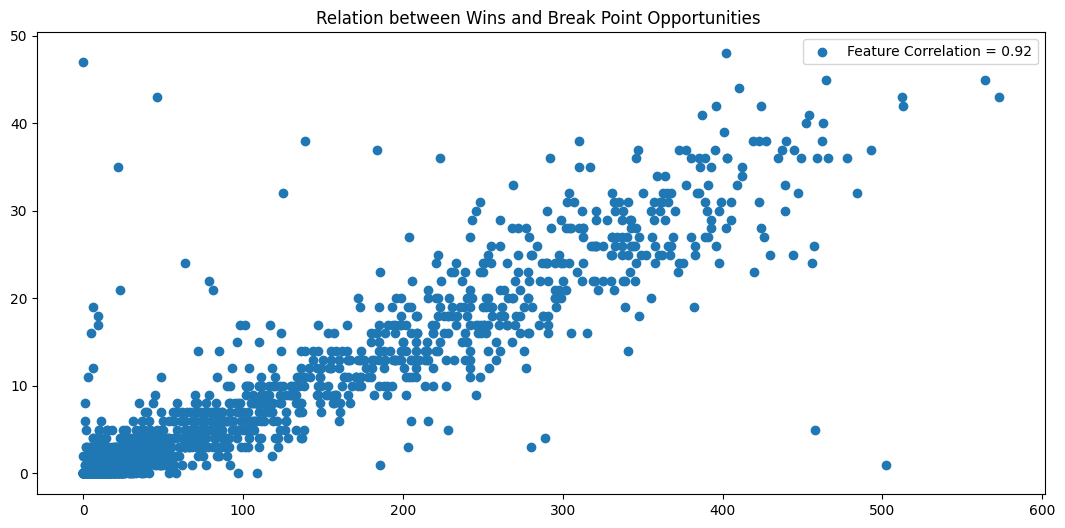

In [10]:
plt.rcParams.update({'figure.figsize':(13,6), 'figure.dpi':100})

fig,ax = plt.subplots(1,1,sharex=False,sharey=False)
# ax.scatter(year,tennis_df["Losses"],label=f'Loss feature Correlation = {np.round(np.corrcoef(year,tennis_df["Losses"])[0,1], 2)}')
ax.scatter(tennis_df["BreakPointsOpportunities"],tennis_df["Wins"],
           label=f'Feature Correlation = {np.round(np.corrcoef(tennis_df["BreakPointsOpportunities"],tennis_df["Wins"])[0,1], 2)}')

plt.title('Relation between Wins and Break Point Opportunities ')
plt.legend()
plt.show()


##### Building a single feature simple linear regression model.

The main purpose of splitting the data set is to let the model first understand our datasets by fitting the training set and evaluate the model performance by predicting the test set. So that we can compare our model’s prediction with test datasets output.

The coefficient: 0.08 and the intercept: -0.04


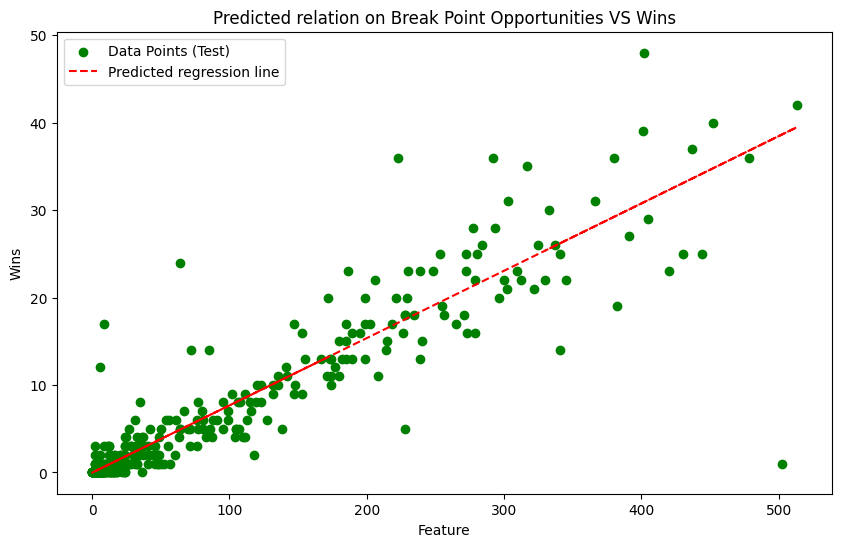

<Figure size 1300x600 with 0 Axes>

In [11]:
# Creating the single feature prediction
x = tennis_df[["BreakPointsOpportunities"]]
y = tennis_df["Wins"]

# Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)

# Fitting the data using the training set
lr = LinearRegression().fit(x_train,y_train)
print("The coefficient: {:.2f} and the intercept: {:.2f}".format(lr.coef_[0],lr.intercept_))

# We will visualize the data line on the testing data from the trained model.
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color="green",marker="o",label="Data Points (Test)")
plt.plot(x_test,lr.predict(x_test),"r--",linewidth=1.5,label="Predicted regression line")
plt.legend()
plt.title("Predicted relation on Break Point Opportunities VS Wins")
plt.xlabel("Feature")
plt.ylabel("Wins")
plt.show()
plt.clf()

Lets run another model on another feature.

Correlation score: 0.043583433108363545


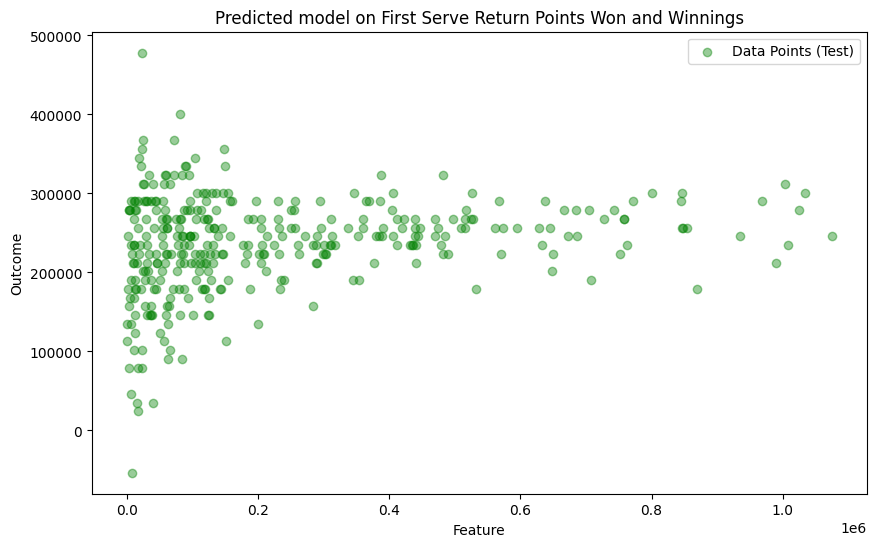

<Figure size 1300x600 with 0 Axes>

In [12]:
feature  = tennis_df[["FirstServeReturnPointsWon"]]
outcome = tennis_df[["Winnings"]]

# Split the data
feature_train,feature_test,outcome_train,outcome_test = train_test_split(feature,outcome,train_size=0.8,random_state=42)

# Create the model
model = LinearRegression()
model.fit(feature_train,outcome_train)
print(f"Correlation score: {model.score(feature_test,outcome_test)}")

# Creating the prediction
prediction = model.predict(feature_test)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(outcome_test,prediction,color="green",marker="o",alpha=0.4,label="Data Points (Test)")
plt.legend()
plt.title("Predicted model on First Serve Return Points Won and Winnings")
plt.xlabel("Feature")
plt.ylabel("Outcome")
plt.show()
plt.clf()


Correlation score: 0.7865551696389492


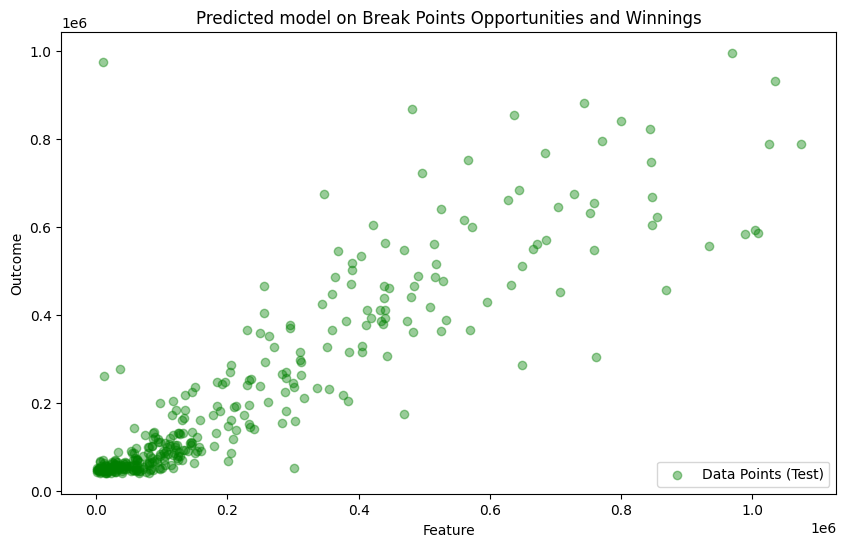

<Figure size 1300x600 with 0 Axes>

In [13]:
feature  = tennis_df[["BreakPointsOpportunities"]]
outcome = tennis_df[["Winnings"]]

# Split the data
feature_train,feature_test,outcome_train,outcome_test = train_test_split(feature,outcome,train_size=0.8,random_state=42)

# Create the model
model = LinearRegression()
model.fit(feature_train,outcome_train)
print(f"Correlation score: {model.score(feature_test,outcome_test)}")

# Creating the prediction
prediction = model.predict(feature_test)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(outcome_test,prediction,color="green",marker="o",alpha=0.4,label="Data Points (Test)")
plt.legend()
plt.title("Predicted model on Break Points Opportunities and Winnings")
plt.xlabel("Feature")
plt.ylabel("Outcome")
plt.show()
plt.clf()


## Multiple Features to predict yearly earnings

##### Lets test this out on 2 features.

Correlation score: 0.7892999342513113


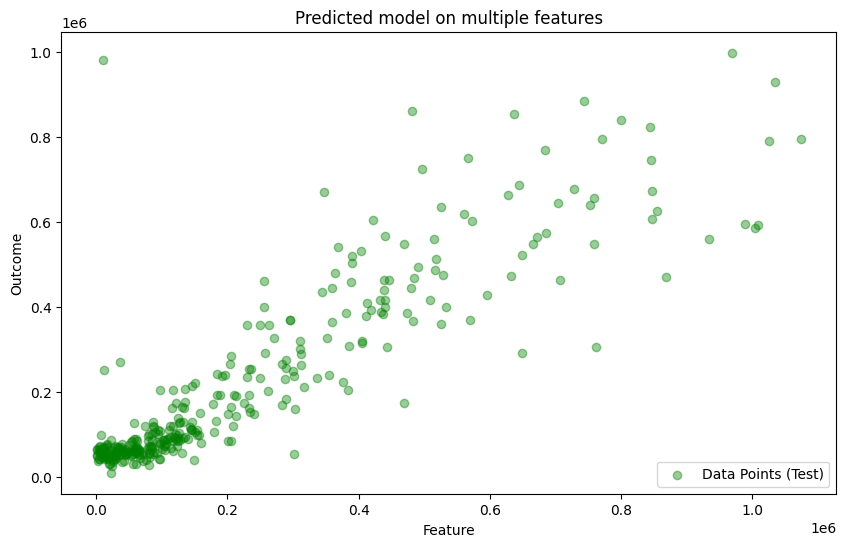

<Figure size 1300x600 with 0 Axes>

In [14]:
features = tennis_df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
outcome = tennis_df[['Winnings']]

# Split the data
feature_train,feature_test,outcome_train,outcome_test = train_test_split(features,outcome,train_size=0.8,random_state=42)

# Create the model
model = LinearRegression()
model.fit(feature_train,outcome_train)
print(f"Correlation score: {model.score(feature_test,outcome_test)}")

# Creating the prediction
prediction = model.predict(feature_test)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(outcome_test,prediction,color="green",marker="o",alpha=0.4,label="Data Points (Test)")
plt.legend()
plt.title("Predicted model on multiple features")
plt.xlabel("Feature")
plt.ylabel("Outcome")
plt.show()
plt.clf()

##### Lets build a model on many features.

Correlation score: 0.8268140857573162


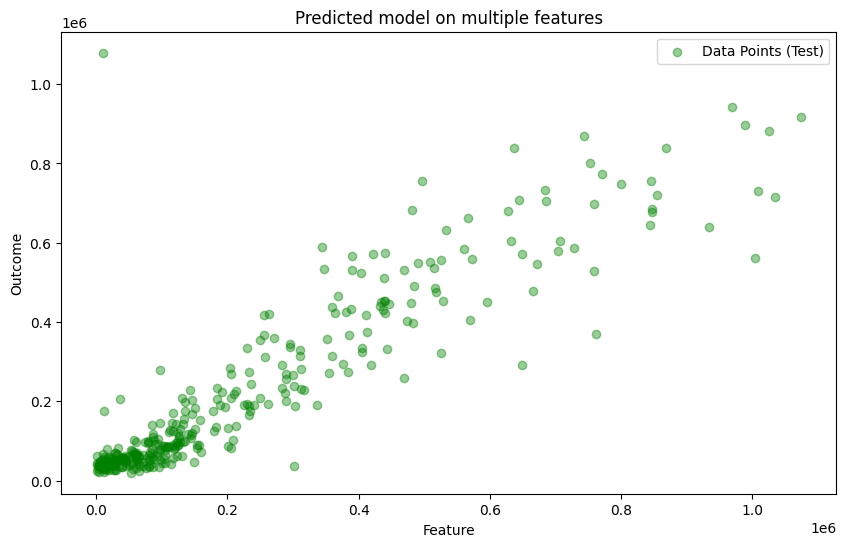

<Figure size 1300x600 with 0 Axes>

In [15]:
features = tennis_df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = tennis_df[['Winnings']]

# Split the data
feature_train,feature_test,outcome_train,outcome_test = train_test_split(features,outcome,train_size=0.8,random_state=42)

# Create the model
model = LinearRegression()
model.fit(feature_train,outcome_train)
print(f"Correlation score: {model.score(feature_test,outcome_test)}")

# Creating the prediction
prediction = model.predict(feature_test)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(outcome_test,prediction,color="green",marker="o",alpha=0.4,label="Data Points (Test)")
plt.legend()
plt.title("Predicted model on multiple features")
plt.xlabel("Feature")
plt.ylabel("Outcome")
plt.show()
plt.clf()


## Conclusions:

1. As we can see from the correlation score that there seems to be an increase in the overall model score from using just one feature to two to many features. Predicting yearly earnings seems to stem from many avenues and skills. We have also made many assumptions here as creating a regression model assumes many things about the data such as homoscedacity, linearity, multicolinearity etc.. 
2. We have also not taken into account the line of best fit here by way of MSE or Adjusted R Squared therefore the model performance has yet to be determined as well as Standardisation or Normalisation.

$$
    Adjusted \space {R^2} = 1-\frac{(1-R^2)*(N-1)}{N-p-1}
$$
where: 
+ R^2 = Sample R-Squared
+ N = Total Sample Size
+ p = Number of independent variable